In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from data_preprocessing_final import initiate_data

In [2]:
data = pd.read_csv('Ames_HousePrice.csv', index_col=0)

In [3]:
train_data_linear, train_target_linear, test_data_linear, test_target_linear, train_data_tree, train_target_tree, test_data_tree, test_target_tree = initiate_data(data)

In [4]:
train_data_tree = train_data_tree.drop('PID', axis = 1)
test_data_tree = test_data_tree.drop('PID', axis = 1)
train_data_tree

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,TotalBath,Bsmt_Unfin_Ratio,TotalLivArea
0,0.0,1.0,3.0,4.0,0.0,14.0,0.0,0.0,2.0,0.0,...,0.491228,0.181452,0.000000,0.000000,0.133399,0.0,0.000000,0.083333,0.000000,0.207745
1,6.0,1.0,3.0,4.0,0.0,20.0,2.0,0.0,2.0,0.0,...,0.350877,0.322581,0.000000,0.000000,0.181818,0.0,0.000000,0.000000,1.000000,0.262882
2,6.0,1.0,3.0,0.0,0.0,20.0,2.0,0.0,5.0,0.0,...,0.789474,0.290323,0.000000,0.503509,0.000000,0.0,0.000000,0.166667,1.000000,0.497539
3,5.0,0.0,3.0,4.0,0.0,19.0,2.0,0.0,2.0,1.0,...,0.991228,0.622984,0.117978,0.078947,0.000000,0.0,0.000000,0.333333,0.416331,0.516574
4,5.0,1.0,3.0,4.0,0.0,7.0,2.0,0.0,0.0,0.0,...,0.701754,0.387097,0.000000,0.000000,0.042490,0.0,0.204082,0.166667,0.739179,0.314736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,5.0,0.0,3.0,4.0,0.0,5.0,2.0,0.0,2.0,0.0,...,0.982456,0.580645,0.117978,0.052632,0.000000,0.0,0.000000,0.166667,1.000000,0.475222
1922,5.0,0.0,0.0,4.0,1.0,21.0,2.0,0.0,0.0,0.0,...,0.394737,0.155242,0.000000,0.000000,0.044466,0.0,0.000000,0.000000,0.386667,0.194454
1923,5.0,1.0,0.0,4.0,1.0,22.0,3.0,0.0,2.0,1.0,...,0.535088,0.217070,0.000000,0.000000,0.000000,0.0,0.000000,0.166667,0.267742,0.374303
1924,5.0,1.0,3.0,4.0,0.0,15.0,2.0,0.0,2.0,0.0,...,0.500000,0.161290,0.000000,0.000000,0.000000,0.0,0.000000,0.166667,0.794444,0.208074


In [5]:
train_target_tree = np.exp(train_target_tree)
test_target_tree = np.exp(test_target_tree)
test_target_tree

0      183500.0
1      133500.0
2      175900.0
3      100000.0
4      124000.0
         ...   
477    192500.0
478    181900.0
479    139000.0
480    217000.0
481    221000.0
Name: SalePrice, Length: 482, dtype: float64

In [6]:
gbm = GradientBoostingRegressor()
gbm.fit(train_data_tree, train_target_tree)
print(gbm.score(train_data_tree, train_target_tree))
print(gbm.score(test_data_tree, test_target_tree))

0.9676756802598898
0.9314940076729377


In [7]:
gbm = GradientBoostingRegressor(n_estimators = 1000)
gbm.fit(train_data_tree, train_target_tree)
print(gbm.score(train_data_tree, train_target_tree))
print(gbm.score(test_data_tree, test_target_tree))

0.9959581063628195
0.9382561022476547


In [8]:
gbm = GradientBoostingRegressor(n_estimators = 1000, max_depth = 2)
gbm.fit(train_data_tree, train_target_tree)
print(gbm.score(train_data_tree, train_target_tree))
print(gbm.score(test_data_tree, test_target_tree))

0.985494367436235
0.9390614199820946


In [11]:
abm = AdaBoostRegressor(n_estimators = 41)
abm.fit(train_data_tree, train_target_tree)
print(abm.score(train_data_tree, train_target_tree))
print(abm.score(test_data_tree, test_target_tree))

0.887738470194798
0.8454010236825729


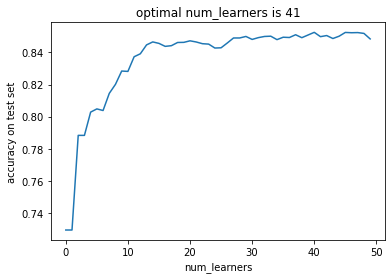

In [10]:
test_accs = []
for num_learners in range(1,51):
    # Train a boosting model on the dataset
    abm = AdaBoostRegressor(n_estimators=num_learners,random_state=0)
    abm.fit(train_data_tree, train_target_tree)

    # Calculate the accuracy on the test set
    test_accs.append(abm.score(test_data_tree, test_target_tree))

plt.plot(test_accs)
plt.xlabel('num_learners')
plt.ylabel('accuracy on test set')
opt_num_learners = range(1,51)[np.argmax(test_accs)]
plt.title('optimal num_learners is {}'.format(opt_num_learners))
plt.show()

In [12]:
params = {'learning_rate':[0.1, .05, .01, .001],'max_depth':[1,2,3], 'n_estimators' : [1000]}

gbm = GradientBoostingRegressor()
grid_search = GridSearchCV(gbm,params)
grid_search.fit(train_data_tree, train_target_tree)

grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}

In [13]:
grid_search.best_score_

0.9373368226400023

In [14]:
gbm = GradientBoostingRegressor(n_estimators = 1000, max_depth = 2, learning_rate = 0.1)
gbm.fit(train_data_tree, train_target_tree)
print(gbm.score(train_data_tree, train_target_tree))
print(gbm.score(test_data_tree, test_target_tree))

0.985494367436235
0.9383502101976606


In [ ]:
params = {'learning_rate':[.1, .2, .3],'max_depth':[1,2,3], 'n_estimators':[1000]}

gbm = GradientBoostingRegressor()
grid_search = GridSearchCV(gbm,params)
grid_search.fit(train_data_tree, train_target_tree)

grid_search.best_params_

In [16]:
gbm = GradientBoostingRegressor(n_estimators = 1000, max_depth = 4, learning_rate = 0.1)
gbm.fit(train_data_tree, train_target_tree)
print(gbm.score(train_data_tree, train_target_tree))
print(gbm.score(test_data_tree, test_target_tree))

0.9994895371535105
0.9278570484385701


In [17]:
params = {'learning_rate':[.3, .2, .1],'max_depth':[3]}

gbm = GradientBoostingRegressor()
grid_search = GridSearchCV(gbm,params)
grid_search.fit(train_data_tree, train_target_tree)

grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 3}

In [20]:
gbm = GradientBoostingRegressor(n_estimators = 1000, max_depth = 2, learning_rate = 0.1)
gbm.fit(train_data_tree, train_target_tree)
print(gbm.score(train_data_tree, train_target_tree))
print(gbm.score(test_data_tree, test_target_tree))

0.985494367436235
0.9386707454723833


In [22]:
import pickle
pickle.dump(gbm, open('gbm_model.pkl', 'wb'))

In [23]:
gbm = GradientBoostingRegressor(learning_rate=0.025, max_depth=4, max_features=8, n_estimators=1000, subsample=0.8)
gbm.fit(train_data_tree, train_target_tree)
print(gbm.score(train_data_tree, train_target_tree))
print(gbm.score(test_data_tree, test_target_tree))

0.989141558315933
0.937993907156269
